# Import Dataset

In [1]:
import pandas as pd

df = pd.read_csv("/kaggle/input/alzheimers-disease-dataset/alzheimers_disease_data.csv")

# Exploratory Data Analysis

In [2]:
df.head()

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis,DoctorInCharge
0,4751,73,0,0,2,22.927749,0,13.297218,6.327112,1.347214,...,0,0,1.725883,0,0,0,1,0,0,XXXConfid
1,4752,89,0,0,0,26.827681,0,4.542524,7.619885,0.518767,...,0,0,2.592424,0,0,0,0,1,0,XXXConfid
2,4753,73,0,3,1,17.795882,0,19.555085,7.844988,1.826335,...,0,0,7.119548,0,1,0,1,0,0,XXXConfid
3,4754,74,1,0,1,33.800817,1,12.209266,8.428001,7.435604,...,0,1,6.481226,0,0,0,0,0,0,XXXConfid
4,4755,89,0,0,0,20.716974,0,18.454356,6.310461,0.795498,...,0,0,0.014691,0,0,1,1,0,0,XXXConfid


In [3]:
df.columns

Index(['PatientID', 'Age', 'Gender', 'Ethnicity', 'EducationLevel', 'BMI',
       'Smoking', 'AlcoholConsumption', 'PhysicalActivity', 'DietQuality',
       'SleepQuality', 'FamilyHistoryAlzheimers', 'CardiovascularDisease',
       'Diabetes', 'Depression', 'HeadInjury', 'Hypertension', 'SystolicBP',
       'DiastolicBP', 'CholesterolTotal', 'CholesterolLDL', 'CholesterolHDL',
       'CholesterolTriglycerides', 'MMSE', 'FunctionalAssessment',
       'MemoryComplaints', 'BehavioralProblems', 'ADL', 'Confusion',
       'Disorientation', 'PersonalityChanges', 'DifficultyCompletingTasks',
       'Forgetfulness', 'Diagnosis', 'DoctorInCharge'],
      dtype='object')

In [4]:
y = df['Diagnosis']

# Dropping columns that don't contain useful info for the models
X = df.drop(columns=['PatientID', 'DoctorInCharge', 'Diagnosis'])

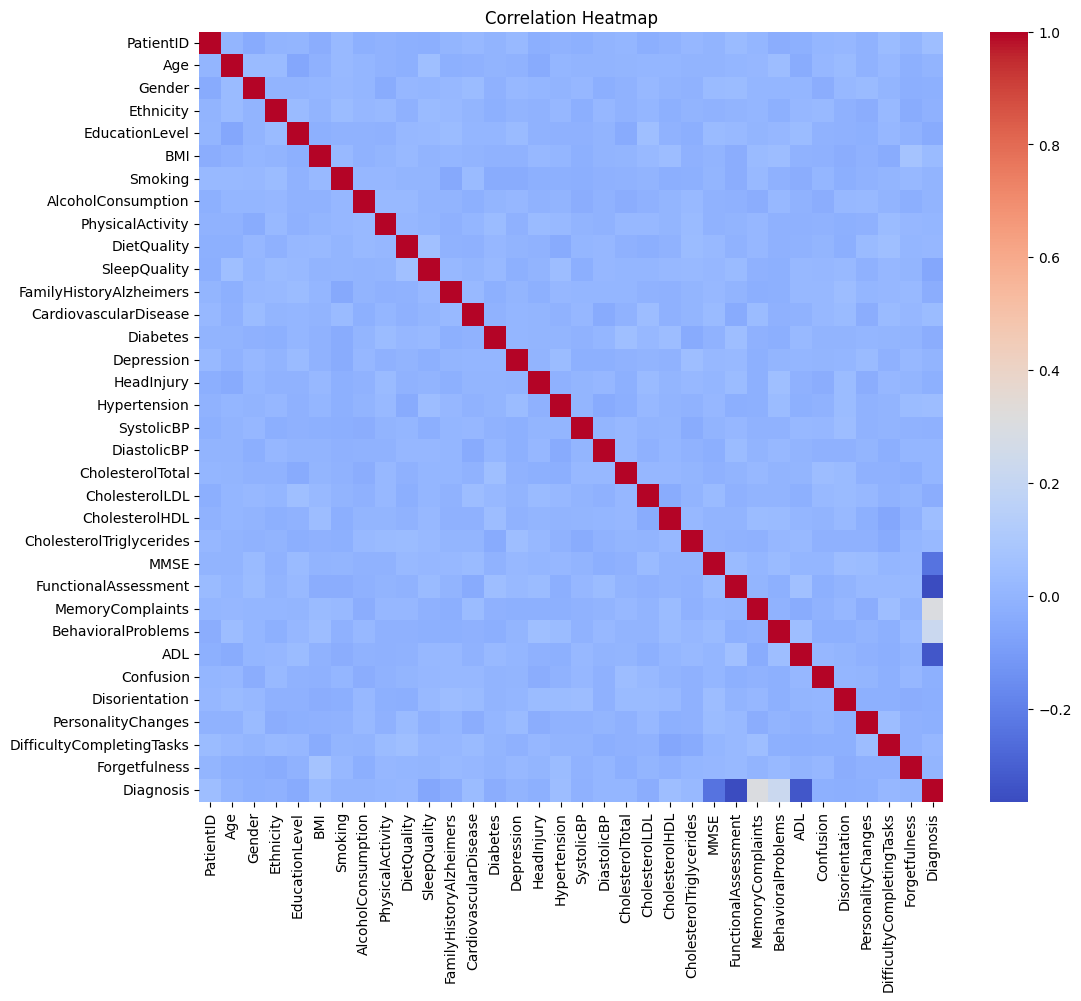

In [14]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation matrix, to look for multicollinearity
corr = df.corr(numeric_only=True)

# Plot heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr, cmap='coolwarm', annot=False)
plt.title('Correlation Heatmap')
plt.show()

Little correlation so input is ready for the model, no real multicollinearity

<Axes: title={'center': 'Diagnosis Class Distribution'}, xlabel='Diagnosis'>

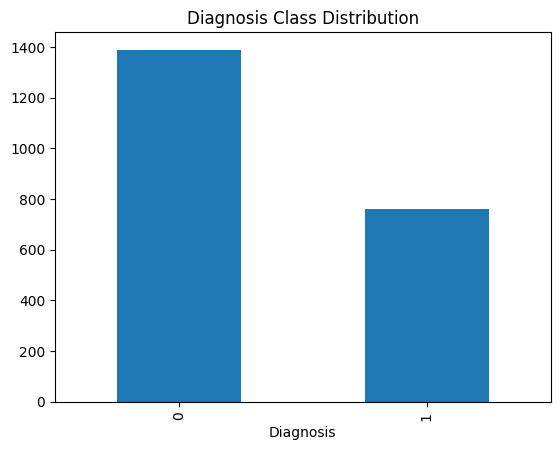

In [11]:
# check if classes are imbalanced
df['Diagnosis'].value_counts().plot(kind='bar', title='Diagnosis Class Distribution')

In [5]:
# one hot encoding to get numerical data
X = pd.get_dummies(X, drop_first=True)

# Logistic Regression Model

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [26]:
from sklearn.linear_model import LogisticRegressionCV

model = LogisticRegressionCV(
    cv=5,
    penalty='l2',  # use 'l1' for Lasso-like feature selection
    solver='liblinear',  # 'liblinear' supports both l1 and l2
    scoring='accuracy',
    class_weight = 'balanced',
    max_iter=1000
)

model.fit(X, y)
print("Best C value (inverse of regularization strength):", log_cv.C_[0])

Best C value (inverse of regularization strength): 2.782559402207126


In [27]:
from sklearn.metrics import classification_report, accuracy_score

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.8395348837209302
              precision    recall  f1-score   support

           0       0.92      0.83      0.87       275
           1       0.74      0.86      0.80       155

    accuracy                           0.84       430
   macro avg       0.83      0.84      0.83       430
weighted avg       0.85      0.84      0.84       430



In [28]:
from sklearn.metrics import f1_score, roc_auc_score

y_pred = log_cv.predict(X)
print("F1 score:", f1_score(y, y_pred))
print("ROC AUC:", roc_auc_score(y, y_pred))

F1 score: 0.7794117647058825
ROC AUC: 0.8334678488878785


### Model Performance Assessment

The optimized logistic regression model achieved an **accuracy of 83.95%**, indicating solid overall performance.

- **Class 0 (No Alzheimer’s)**: Precision = 0.92, Recall = 0.83 → The model is very good at correctly identifying patients **without** Alzheimer’s.
- **Class 1 (Alzheimer’s)**: Precision = 0.74, Recall = 0.86 → It’s slightly less precise but **better at catching actual Alzheimer’s cases** (high recall).
- **F1 Score (Class 1)**: 0.78 → Good balance between precision and recall for Alzheimer’s detection.
- **ROC AUC = 0.83** → The model has strong ability to distinguish between classes overall.

**Conclusion**: The model performs well, especially in identifying Alzheimer’s patients (high recall), with a good balance between sensitivity and specificity. Further improvement could come from feature engineering or ensemble models.


In [29]:
import pandas as pd

# Get coefficients
coeffs = pd.Series(model.coef_[0], index=X.columns)
print(coeffs.sort_values(ascending=False))

MemoryComplaints             2.556966
BehavioralProblems           2.438325
Hypertension                 0.254527
CardiovascularDisease        0.219803
DifficultyCompletingTasks    0.112320
Depression                   0.061428
DietQuality                  0.011533
CholesterolHDL               0.005071
DiastolicBP                  0.002981
Diabetes                     0.002941
SystolicBP                   0.001182
CholesterolTotal             0.001165
CholesterolTriglycerides     0.000851
BMI                         -0.001656
CholesterolLDL              -0.002483
AlcoholConsumption          -0.006045
PhysicalActivity            -0.006243
Age                         -0.007009
PersonalityChanges          -0.012448
Forgetfulness               -0.033505
Ethnicity                   -0.034451
Gender                      -0.040479
SleepQuality                -0.040483
EducationLevel              -0.066246
MMSE                        -0.096681
Disorientation              -0.109773
FamilyHistor

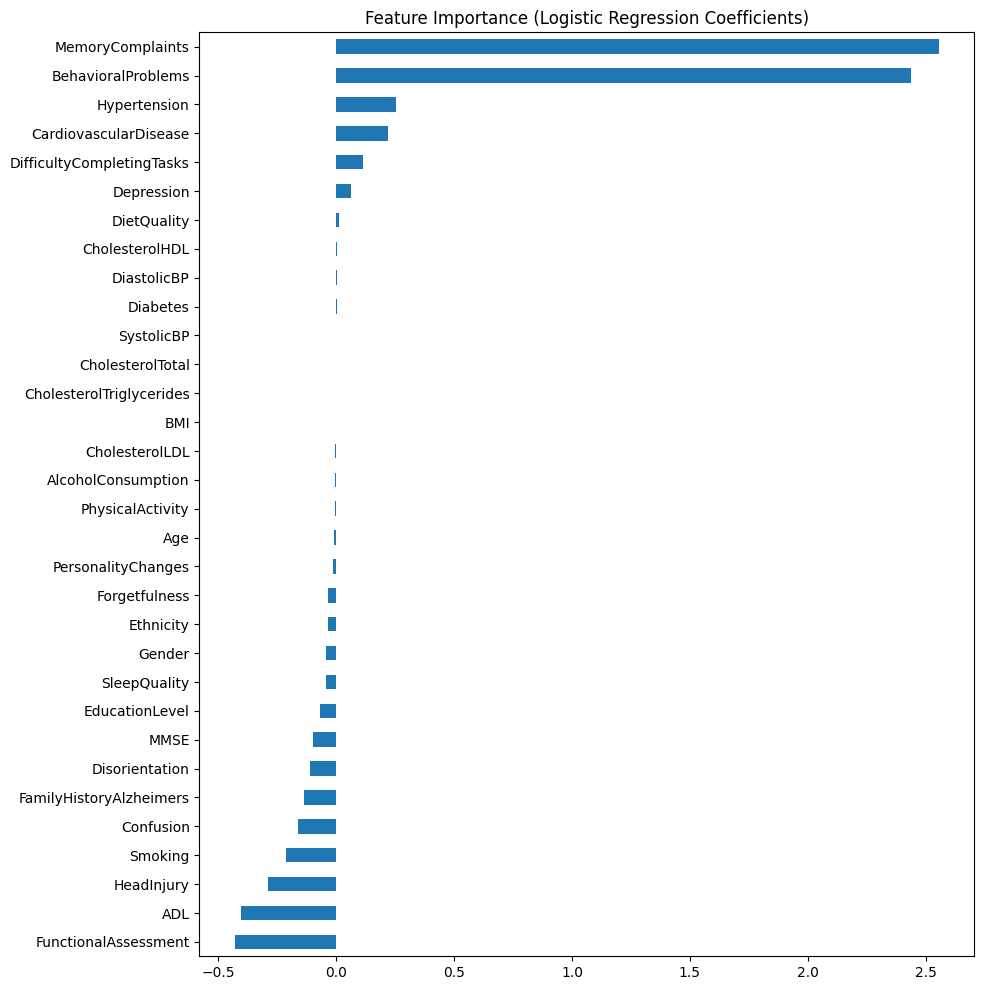

In [30]:
coeffs.sort_values().plot(kind='barh', figsize=(10, 12))
plt.title('Feature Importance (Logistic Regression Coefficients)')
plt.show()

### Simple Coefficient Analysis

- **Memory complaints** and **behavioral problems** are the strongest signs of Alzheimer’s.
- **Hypertension** and **heart disease** slightly increase the chances too.
- **Good daily function (ADL, FunctionalAssessment)** strongly lowers the risk.
- **Head injury**, **smoking**, and **confusion** are linked to lower risk in this model, which might be due to how the data is structured.
- Most other features (like cholesterol, age, physical activity) don’t have much impact here.